# Supervised Learning | Classification (SVM) | Case-study

## Bank Customers Retirement [Classification (SVM)]

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()؛

### Loading & Inspecting Data

In [ ]:
# Load the data & check what's inside
bank = pd.read_csv('bank_customer_retirement.csv')
bank.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


### Exploring Data

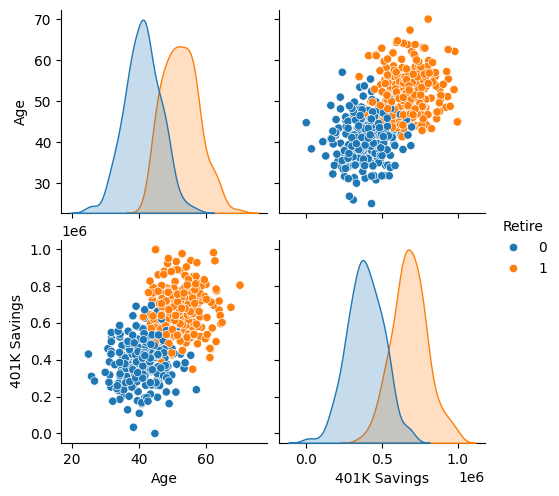

In [ ]:
sns.pairplot(bank, hue = 'Retire', vars = ['Age', '401K Savings'] )

<Axes: ylabel='count'>

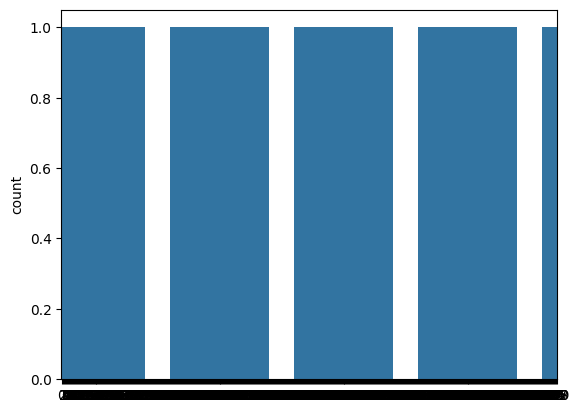

In [ ]:
sns.countplot(bank['Retire'], label = "Retirement") 

### Features Extraction & Data Preprocessing

In [ ]:
bank = bank.drop(['Customer ID'],axis=1)
bank

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1
...,...,...,...
495,46.678128,704243.0776,1
496,43.545007,483175.9998,0
497,46.476724,354919.1987,0
498,50.903631,639789.9219,1


In [ ]:
X = bank.drop(['Retire'],axis=1).values
X

array([[3.91804173e+01, 3.22349874e+05],
       [5.61016860e+01, 7.68671574e+05],
       [5.70230427e+01, 8.21505472e+05],
       [4.37113581e+01, 4.94187485e+05],
       [5.47288232e+01, 6.91435772e+05],
       [5.04997891e+01, 7.42398907e+05],
       [3.95733022e+01, 5.78650316e+05],
       [5.51593087e+01, 5.33821201e+05],
       [3.07912714e+01, 4.59592408e+05],
       [4.04560728e+01, 3.96800251e+05],
       [3.38911974e+01, 2.72808272e+05],
       [4.27544162e+01, 3.77042246e+05],
       [4.42249802e+01, 4.82773224e+05],
       [4.74990645e+01, 6.28103678e+05],
       [6.28624108e+01, 7.71170284e+05],
       [5.63314358e+01, 5.31736742e+05],
       [4.31669950e+01, 4.75505760e+05],
       [6.37855439e+01, 6.69249971e+05],
       [4.57904008e+01, 4.88283996e+05],
       [4.90707308e+01, 6.66179034e+05],
       [4.49290770e+01, 6.67652074e+05],
       [4.83379384e+01, 5.76300132e+05],
       [5.12910441e+01, 5.84324079e+05],
       [4.70737861e+01, 6.76035723e+05],
       [4.775975

In [ ]:
y = bank['Retire'].values
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

### Model Training & Prediction

In [ ]:
from sklearn.svm import SVC 

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(X_train, y_train)

SVC()

### Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
y_predict = svc_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_predict))

[[39  4]
 [ 6 51]]


In [ ]:
print(accuracy_score(y_test, y_predict))

0.9


==========

# GOOD LUCK!